## Лабораторная работа №5 (домашняя работа)

Скачайте изображение шахмотной доски по ссылке https://drive.google.com/uc?export=download&id=1nJwSqagSV06k3e2LT2Ykj5vRWfKB2p1u При помощи операций эрозии и расширения, рассмотренных на занятии, очистите изображение от шумов. Результат выведите на экран.

In [23]:
import cv2
import numpy as np
from PIL import Image
import os
from matplotlib import pyplot as plt

Изображение успешно загружено


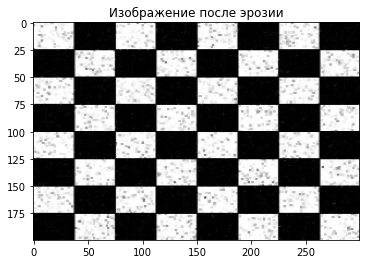

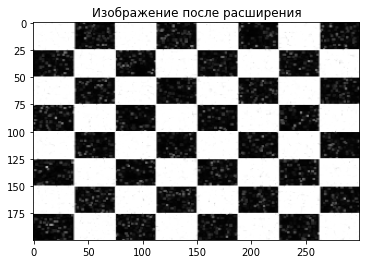

Изображение сохранено как new_chess.jpeg


In [46]:
# Загрузка и чтение изображения
image_path = 'chess.jpeg'
image = cv2.imread(image_path, 0)

# Проверка, удалось ли загрузить изображение
if image is None:
    print(f"Не удалось загрузить изображение {image_path}")
else:
    print("Изображение успешно загружено")

    # Изменение размера изображения
    resized_image = cv2.resize(image, (300, 200))

    # Задаем значение ядра
    kernel = np.full((2, 2), 1, np.uint8)

    # Выполняем эрозию
    image_erosion = cv2.erode(resized_image, kernel)

    # Отображение изображения после эрозии
    plt.imshow(image_erosion, cmap='gray')
    plt.title('Изображение после эрозии')
    plt.show()

    # Выполняем расширение
    image_dilation = cv2.dilate(resized_image, kernel)

    # Отображение изображения после расширения
    plt.imshow(image_dilation, cmap='gray')
    plt.title('Изображение после расширения')
    plt.show()

    # Сохранение полученного изображения
    output = 'new_chess.jpeg'
    cv2.imwrite(output, image_dilation)
    print(f"Изображение сохранено как {output}")

На изображении шахматной доски, полученном в результате выполнения предыдущего задания, выполните операцию обнаружения линий. Отрисуйте обнаруженные линии на изображении красным цветом.


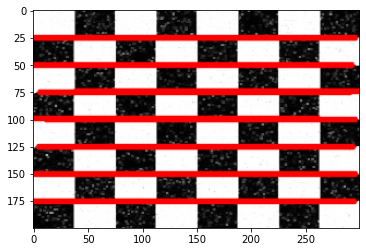

In [48]:
# Загрузка и чтение изображения, полученного из предыдущего задания
image = cv2.imread('new_chess.jpeg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gray, 50, 150)

# Min длина линии
minLineLength = 40
# Max зазор между двумя линиями, чтобы считать их одной линией
maxLineGap = 250

# Поиск линий с помощью преобразования Хафа 
lines = cv2.HoughLinesP(canny, 1, np.pi/180, threshold=100, minLineLength=minLineLength, maxLineGap=maxLineGap)

lin_horiz = []
lin_vert = []

if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        if x1 == x2:  
            lin_vert.append(line[0])
        elif y1 == y2:  
            lin_horiz.append(line[0])

    for line in lin_horiz:
        cv2.line(image, (line[0], line[1]), (line[2], line[3]), (0, 0, 255), 3, cv2.LINE_AA)
    for line in lin_vert:
        cv2.line(image, (line[0], line[1]), (line[2], line[3]), (0, 0, 255), 3, cv2.LINE_AA)

    # Показать изображение с обнаруженными линиями
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()
else:
    print("Линии не обнаружены")

При помощи библиотеки cv2 на занятии мы находили окружности на изображении с автомобильными дисками. Доработайте алгоритм таким образом, чтобы вместо окружностей на изображении отрисовывались прямоугольники.

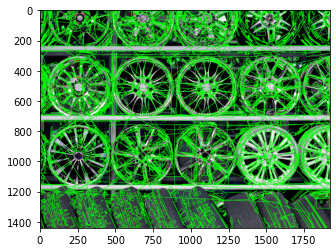

In [50]:
# Загрузка изображения
image = cv2.imread('depositphotos_11zon.jpeg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Применение фильтрации для выделения краев
edges = cv2.Canny(gray, 50, 150)

# Поиск контуров на изображении
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Проход по каждому контуру
for contour in contours:
    # Нахождение ограничивающего прямоугольника для контура
    rect = cv2.minAreaRect(contour)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    
    # Отрисовка прямоугольника на изображении
    cv2.drawContours(image, [box], 0, (0, 255, 0), 2)

# Отображение изображения с прямоугольниками
plt.imshow(image)

Используя пороговую функцию cv2.threshold() на изображении deer.jpeg, преобразуйте изображение в бинарную маску, в которой силуэт животного будет белым на черном фоне. При необходимости можно воспользоваться функциями эрозии и расширения.

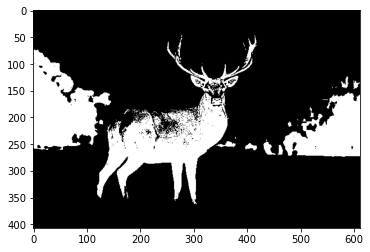

In [45]:
# Загрузка изображения
image = cv2.imread('deer.jpeg', cv2.IMREAD_GRAYSCALE)

# Применение пороговой функции
_, binary_mask = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)

# Отображение бинарной маски
plt.imshow(binary_mask, cmap='gray')
plt.show()

Скачайте изображение мыльных пузырей по ссылке https://drive.google.com/uc?export=download&id=1F8jvdUSC1G6KdWA5j8kRBPH_OQ9hAvgS. Выполните распознавание окружностей как можно большего количества мыльных пузырей при помощи библиотеки cv2 и отрисуйте их на изображении.

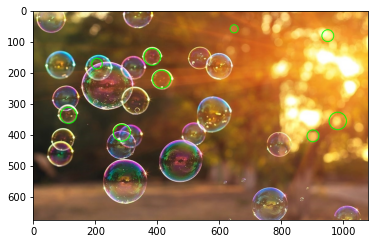

In [44]:
image = cv2.imread('Bubbles_11zon.jpeg', cv2.IMREAD_COLOR)

# Преобразование в оттенки серого
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Применение размытия для сглаживания изображения и удаления шума
gray_blurred = cv2.medianBlur(gray, 5)

# Распознавание окружностей методом Хафа
circles = cv2.HoughCircles(gray_blurred, cv2.HOUGH_GRADIENT, dp=1, minDist=50, param1=50, param2=30, minRadius=1, maxRadius=30)

# Проверка, были ли найдены окружности
if circles is not None:
    circles = np.uint16(np.around(circles))
    
    # Отрисовка окружностей
    for i in circles[0, :]:
        center = (i[0], i[1])
        radius = i[2]
        # Отрисовка окружности
        cv2.circle(image, center, radius, (0, 255, 0), 2)

# Отображение изображения с обнаруженными окружностями
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()